# You can use this file to reproduce Figure 3, 5.a, 6, 7, 8, 9 of the paper.

In [4]:
from ordered_set import OrderedSet
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

methods_ids = [None, None]

In [5]:
api = wandb.Api()

path_prefix = "akileshbadrinaaraayanan/ContPlay_Hanabi_complete/"

methods_ids[0] = {'ER_easy_SGD':["21fcjuyd", "3xnbrn5h", "2srroesr", "1enyj9ya", "1nbilemc"], # 
               "ER_easy_Adam": ["13hq7r8a","2bbrdinz", "171lukge", "yk3cnhwo","2fcdu6gd"], #  
               "AGEM_easy_SGD": ["2we3u7io", "2emavkv9", "2x20nzls", "3bg7m912", "2d3jtjw1"], #
                'AGEM_easy_Adam': ["3b762qpv", "llqdlyhn", "2vtkjpdl" , "3hzuj75l"], #,"256bejp0"
                "EWC_online_easy_SGD": ["wkqrs64f", "18s9csst", "2r4wch8c", "2ztlvstg", "mb5apokb"],
                "EWC_online_easy_Adam": ["30pdsd8c", "2twwcdhl", "2ih6mmro", "1fbwujpm", "1s8v9m5q"],
                'EWC_offline_easy_SGD':["358spuzk", "3vcyr7om", "2bgg4bcj", "l4yrzz44", "7fr5xi8l"],
                "EWC_offline_easy_Adam": ["m9chgkh5", "2htxwrle", "25p7muat", "20690fjz", "klslt4k5"],
                "Naive_easy_SGD": [ "2wreyzem", "4rrev7yz", "wvxlu5jr","emqnkwob", "tx924uy8"],
                "Naive_easy_Adam": ["ahb81594", "1oopgkwh", "3g20sh1z", "2wbug73y", "ymqdgcg3" ], #
                "Multi_task_easy_SGD": ["3c6hwfmz", "2f9tqch4"   , "32bkvsuw", "s6n7p8rq" ,"14v5hu3l" ],
                "Multi_task_easy_Adam": ["2edx1vje", "2tlplr0t" , "je00g5ma", "3pte2nmn", "apie9iwu"]}

In [6]:
api = wandb.Api()

path_prefix = "akileshbadrinaaraayanan/ContPlay_Hanabi_complete/"


methods_ids[1] = {'ER_hard_SGD':["7pjn83rl",  "28952wnc", "wp1p4com","2irztg46", "286k8cmp"],
                  'ER_hard_Adam': [ "1yrpgwmo", "3g7sutwt", "o43sxn85", "165c4icb"], #, "19h58od3"
                  "AGEM_hard_SGD": ["31ys3yvz", "2d79qgrh", "txvrho37", "3go6nnxz", "5ube1of2"],
                  "AGEM_hard_Adam": ["2ca8ghct", "19xwrc2x","36tf43qc", "2w8xb2kd", "23pcq7zu"],
                  "EWC_online_hard_SGD": ["17buqamy",  "3i42o6kn", "10wf7tfg","385m7mdq","1qihjprd"],
                  "EWC_online_hard_Adam": ["1ioyqebv", "3euh9kro","2i8bff15","1k2uqk8k","3g4vm8qc"],
                  'EWC_offline_hard_SGD':["3bfbfz3u", "1bqzqswf", "29yz4jbu","15sgx624","2uteg5wb"],
                  "EWC_offline_hard_Adam": ["3r5ovysy", "2rzetavo","6ygm1ov8","3rny576p","122tps0g"],
                  "Naive_hard_SGD": ["24rm6eyr", "2xchlugv","2fwx3n4c", "24lvv6la", "2cw8q14p"],
                  "Naive_hard_Adam": ["1lx03e2v","1ta8gzxq","3fra383n", "330z71l1", "t1ul4k1y"],
                  "Multi_task_hard_SGD": [ "231pbkup", "1el93ywo","21l5q9i2","1ou5l2hb"],
                  "Multi_task_hard_Adam": [ "2jl321x6", "2042j3td","23l2b478","3ry6ksh8"]
               }


In [7]:
results_dict = [{}, {}]
for i in range(len(results_dict)):
    for method in methods_ids[i].keys():
        all_results, all_configs = [], []
        for seed in range(len(methods_ids[i][method])):
            run = api.run(path_prefix + methods_ids[i][method][seed])
            history = run.scan_history()

            results = {key:[] for key in run.history().columns}
            for row in history:
                for key in row.keys():
                    results[key].append(row[key])
            results['epoch_fewshot'] = OrderedSet(results['epoch_fewshot'])
            all_results.append(results)
            all_configs.append(run.config)
        results_dict[i][method] = all_results
        results_dict[i][method+'_configs'] = all_configs


In [8]:
font_size = 16
font_size_legend = 18
font_size_title = 8

plt.rc('font', size=font_size)  # controls default text sizes
plt.rc('axes', titlesize=font_size_title)  # fontsize of the axes title
plt.rc('axes', labelsize=font_size)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size)  # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)  # fontsize of the tick labels
plt.rc('legend', fontsize=font_size_legend)  # legend fontsize
plt.rc('figure', titlesize=font_size_title)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 80 

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

## Figure 3
### All LLL benchmarks
### To inclue all LLL methods, just modify method_to_plot list.

EASY agents, eval_score_zs_curtask
max_curve:ER_easy_Adam,13hq7r8a, seed:0, length:100
max_curve:ER_easy_Adam,2bbrdinz, seed:1, length:105
max_curve:ER_easy_Adam,171lukge, seed:2, length:105
max_curve:ER_easy_Adam,yk3cnhwo, seed:3, length:105
max_curve:ER_easy_Adam,2fcdu6gd, seed:4, length:105
max_num_epochs: 105
max_curve:AGEM_easy_Adam,3b762qpv, seed:0, length:100
max_curve:AGEM_easy_Adam,llqdlyhn, seed:1, length:105
max_curve:AGEM_easy_Adam,2vtkjpdl, seed:2, length:105
max_curve:AGEM_easy_Adam,3hzuj75l, seed:3, length:105
max_num_epochs: 105
max_curve:EWC_online_easy_Adam,30pdsd8c, seed:0, length:100
max_curve:EWC_online_easy_Adam,2twwcdhl, seed:1, length:105
max_curve:EWC_online_easy_Adam,2ih6mmro, seed:2, length:105
max_curve:EWC_online_easy_Adam,1fbwujpm, seed:3, length:105
max_curve:EWC_online_easy_Adam,1s8v9m5q, seed:4, length:105
max_num_epochs: 105
max_curve:Naive_easy_Adam,ahb81594, seed:0, length:100
max_curve:Naive_easy_Adam,1oopgkwh, seed:1, length:105
max_curve:Naive_eas

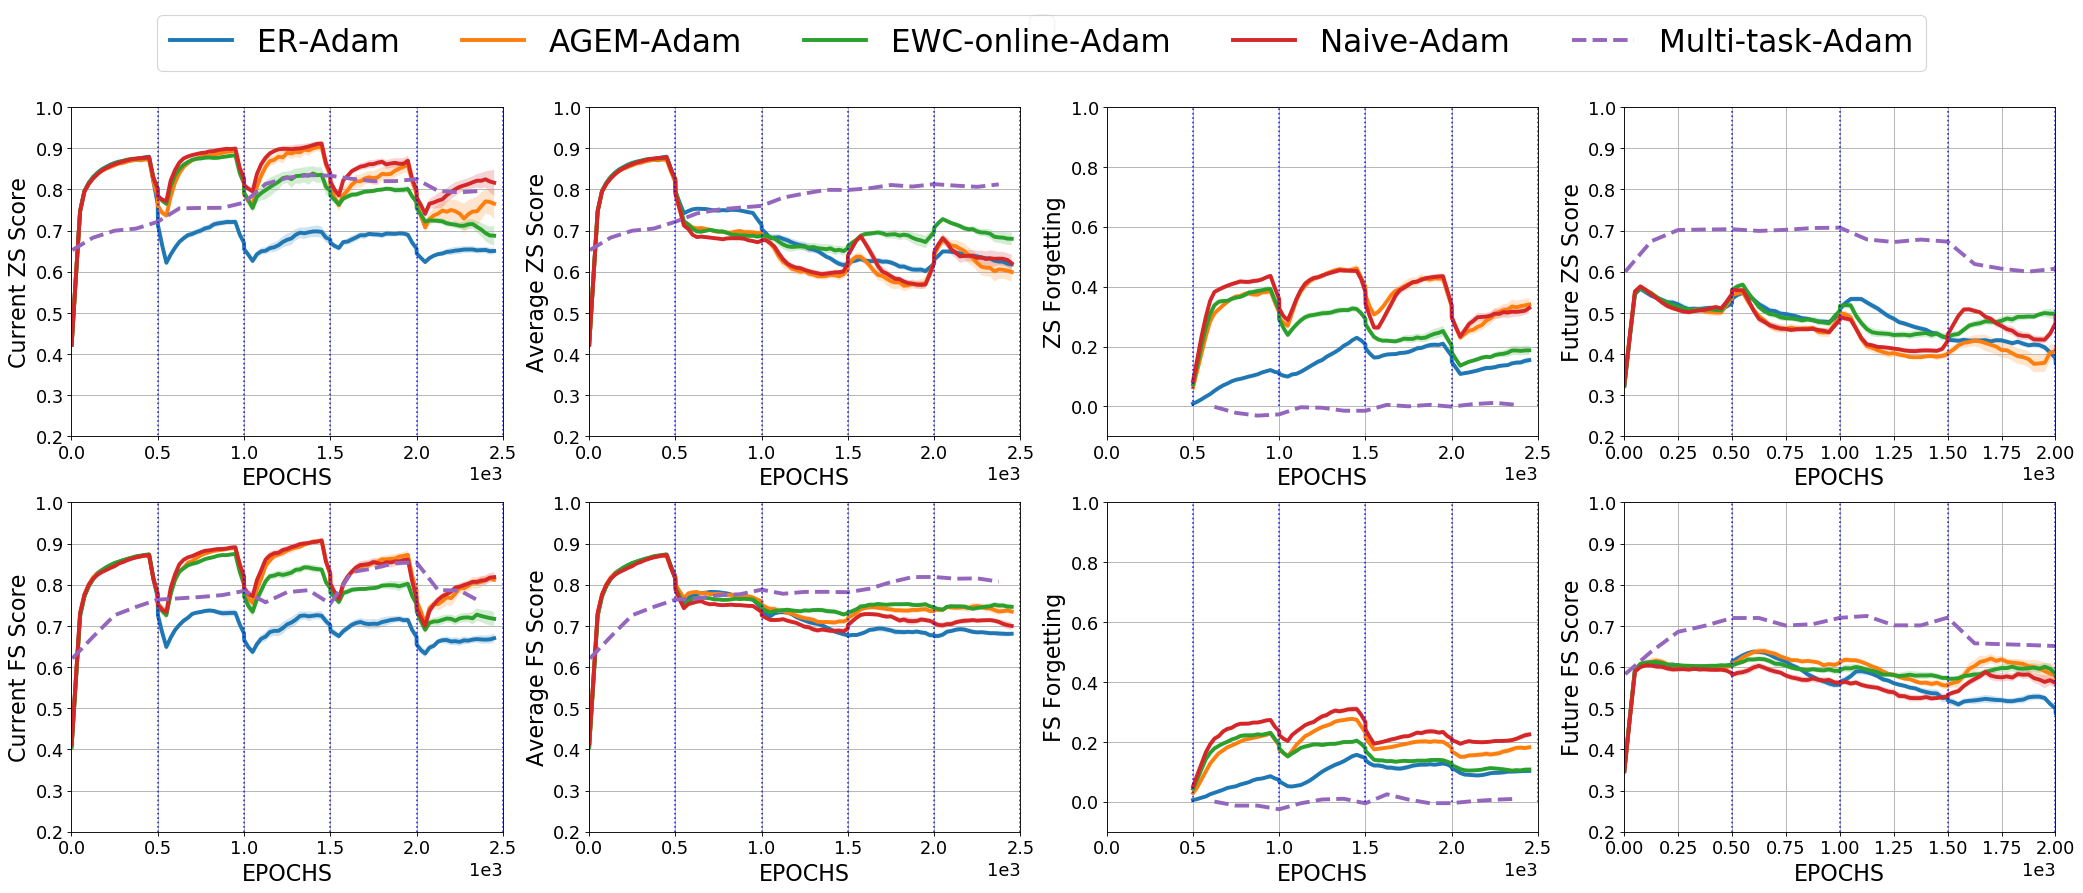

HARD agents, eval_score_zs_curtask
max_curve:ER_hard_Adam,1yrpgwmo, seed:0, length:100
max_curve:ER_hard_Adam,3g7sutwt, seed:1, length:105
max_curve:ER_hard_Adam,o43sxn85, seed:2, length:105
max_curve:ER_hard_Adam,165c4icb, seed:3, length:105
max_num_epochs: 105
max_curve:AGEM_hard_Adam,2ca8ghct, seed:0, length:100
max_curve:AGEM_hard_Adam,19xwrc2x, seed:1, length:105
max_curve:AGEM_hard_Adam,36tf43qc, seed:2, length:105
max_curve:AGEM_hard_Adam,2w8xb2kd, seed:3, length:105
max_curve:AGEM_hard_Adam,23pcq7zu, seed:4, length:105
max_num_epochs: 105
max_curve:EWC_online_hard_Adam,1ioyqebv, seed:0, length:100
max_curve:EWC_online_hard_Adam,3euh9kro, seed:1, length:105
max_curve:EWC_online_hard_Adam,2i8bff15, seed:2, length:105
max_curve:EWC_online_hard_Adam,1k2uqk8k, seed:3, length:105
max_curve:EWC_online_hard_Adam,3g4vm8qc, seed:4, length:105
max_num_epochs: 105
max_curve:Naive_hard_Adam,1lx03e2v, seed:0, length:102
max_curve:Naive_hard_Adam,1ta8gzxq, seed:1, length:105
max_curve:Naive_h

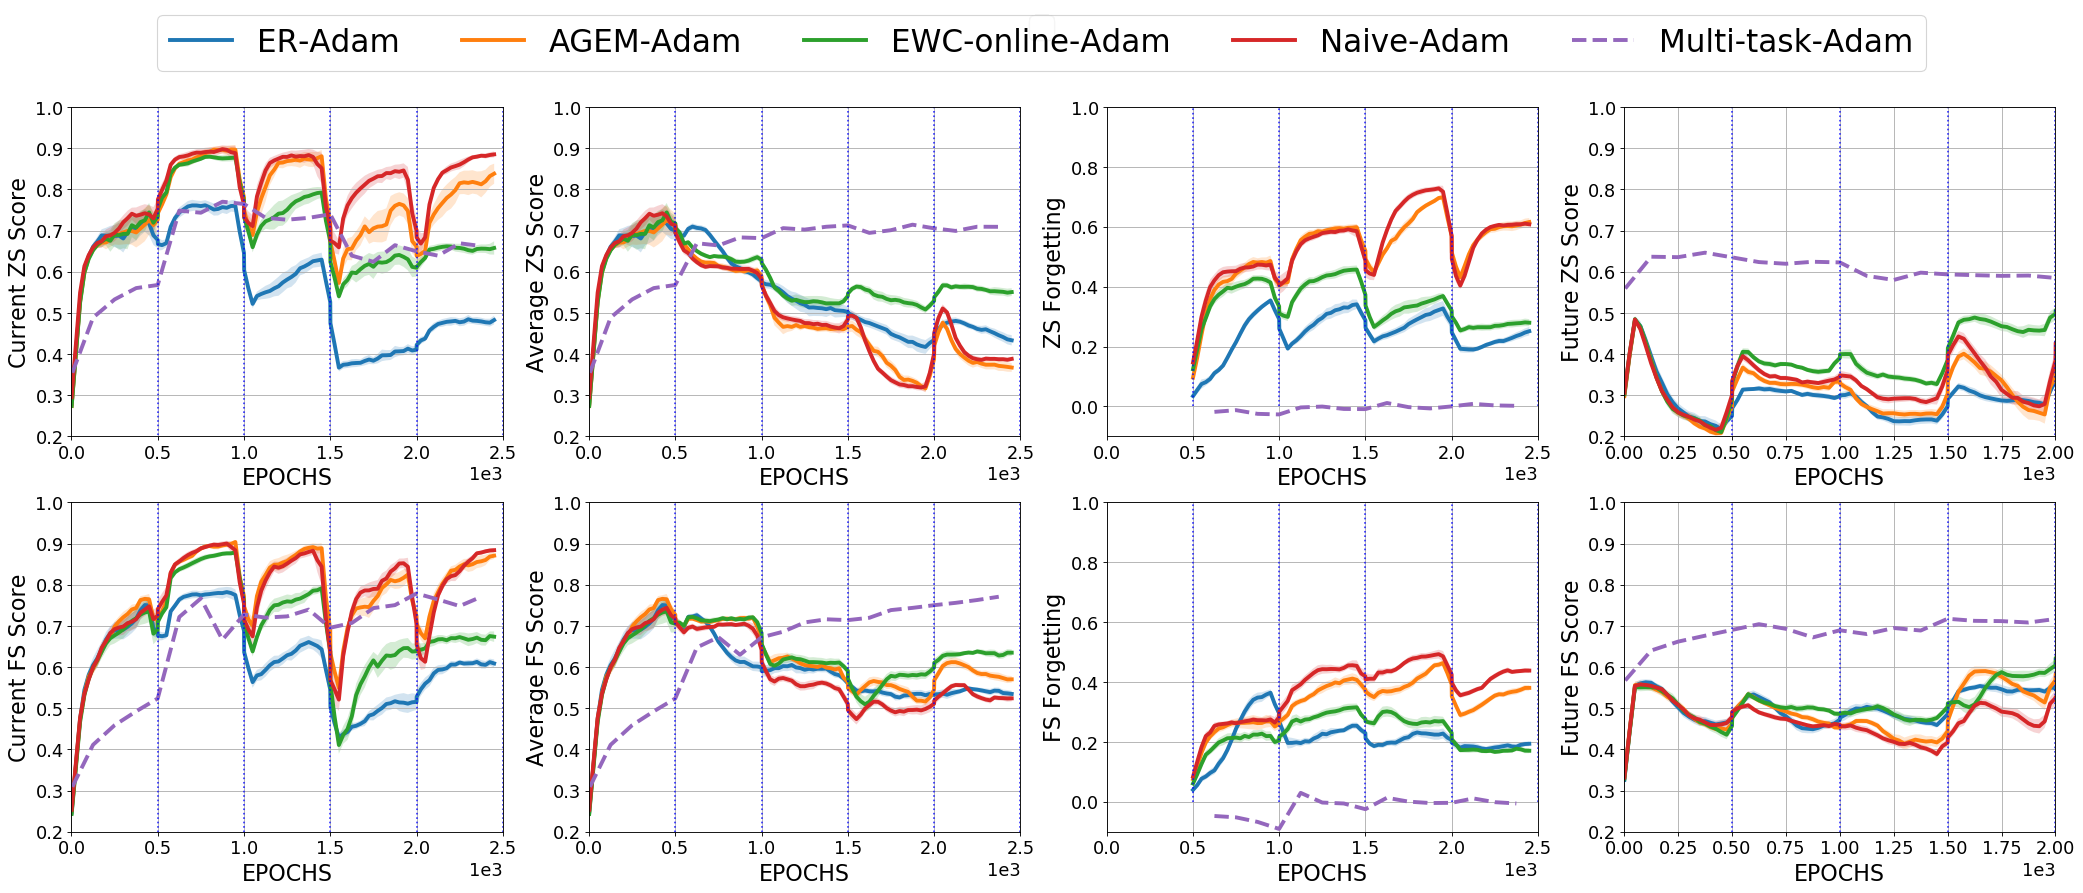

In [10]:
num_tasks = 5
task_length = 500
Agent_types = ['EASY', 'HARD']
metrics = ["eval_score_zs_curtask", "avg_zs_score", "avg_zs_forgetting", "avg_future_zs_score", "eval_score_fs_curtask", "avg_fs_score", "avg_fs_forgetting", "avg_fs_future_score"]

y_labels = ["Current ZS Score",  "Average ZS Score",  "ZS Forgetting",  "Future ZS Score", "Current FS Score", "Average FS Score", "FS Forgetting", "Future FS Score"]

x_axises = ["epoch_zs_curtask", "epoch_zs_curtask", 'epoch_zs_avg_forgetting',  "epoch_zs_avg_future_score", "epoch_fs_curtask", "epoch_fs_curtask" , 'epoch_zs_avg_forgetting', "epoch_fs_avg_future_score"]


Figure = 3
methods_to_plot = [["ER_easy_Adam", 'AGEM_easy_Adam', "EWC_online_easy_Adam", "Naive_easy_Adam", "Multi_task_easy_Adam"] ,
                    ["ER_hard_Adam", 'AGEM_hard_Adam', "EWC_online_hard_Adam", "Naive_hard_Adam", "Multi_task_hard_Adam"]
                   ]
# Figure = 6
# methods_to_plot = [["ER_easy_Adam", 'AGEM_easy_Adam', "EWC_online_easy_Adam", "EWC_offline_easy_Adam", "Naive_easy_Adam", "Multi_task_easy_Adam"] ,
#                     ["ER_hard_Adam", 'AGEM_hard_Adam', "EWC_online_hard_Adam", "EWC_offline_hard_Adam", "Naive_hard_Adam", "Multi_task_hard_Adam"]
#                    ]
# Figure = 8
# methods_to_plot = [["ER_easy_SGD", 'AGEM_easy_SGD', "EWC_online_easy_SGD", "EWC_offline_easy_SGD", "Naive_easy_SGD", "Multi_task_easy_SGD"] ,
#                     ["ER_hard_SGD", 'AGEM_hard_SGD', "EWC_online_hard_SGD", "EWC_offline_hard_SGD", "Naive_hard_SGD", "Multi_task_hard_SGD"]
#                    ]


for k in range(0, len(Agent_types)):
        
    fig = plt.figure(figsize=(32,12))
    axes = fig.subplots(nrows=2, ncols=4)
    for metric, x_axis, ylabel, ax in zip(metrics, x_axises, y_labels, fig.axes):
    
        if not os.path.exists('plots/full_cruves/' + Agent_types[k]):
            os.makedirs('plots/full_cruves/' + Agent_types[k])
        for method in methods_to_plot[k]:
            num_seeds = len(results_dict[k][method])

            if num_seeds > 0:
                if len(method.split('_')) == 3:
                    label = method.split('_')[0] + '-' + method.split('_')[2]
                elif len(method.split('_')) == 4:
                    label = method.split('_')[0] + '-' + method.split('_')[1] + '-' + method.split('_')[3]

                y_max_len, x_max_len, s_max = 0, 0, 0
                for s in range(num_seeds):
                    if len(results_dict[k][method][s][metric]) > y_max_len:
                        y_max_len = len(results_dict[k][method][s][metric])
                        y_max_len_curve = results_dict[k][method][s][metric]
                        s_max= s
                    if metric == "avg_zs_score":
                        print('max_curve:{},{}, seed:{}, length:{}'.format(method, methods_ids[k][method][s], s, len(results_dict[k][method][s][metric])))
                    if len(results_dict[k][method][s][x_axis]) > x_max_len:
                        x_max_len = len(results_dict[k][method][s][x_axis])
                        x_max_len_curve = results_dict[k][method][s][x_axis]
                if metric == "avg_zs_score":
                    print('max_num_epochs:', y_max_len)
                y = np.zeros((num_seeds, y_max_len))
                
                
                for s in range(num_seeds):
                    x_list = list(range(y_max_len))
                    length = y_max_len
                    if len(results_dict[k][method][s][metric]) < y_max_len:
                        start_idx_to_remove = y_max_len - len(results_dict[k][method][s][metric])
                        to_remove = [0, 21, 42, 63, 84][-start_idx_to_remove:]
                        if metric.split('_')[-1] == 'forgetting':
                            to_remove = [0, 21, 42, 63][-start_idx_to_remove:]
                        if method.split('_')[0] == 'Multi':
                            to_remove = [0]
                        for r in to_remove:
                            x_list.remove(r)
                        
                        y[s, to_remove] = np.array(results_dict[k][method][s_max][metric])[to_remove] / 25
                    y[s, x_list[:len(results_dict[k][method][s][metric])]] = np.array(results_dict[k][method][s][metric]) / 25
                    

                if method.split('_')[-1] == 'SGD':
                    ls = '-.'
                elif method.split('_')[-1] == 'Adam':
                    ls = '-'
                
                if method.split('_')[0] == 'Multi':
                    ls = '--'
                    N = 1 
                    ax.plot(x_max_len_curve[0:-1],  y.mean(axis=0)[0:-1], ls, alpha=1, lw=3.5, label=label)
#                     print('A_T for {} is:  {} +/- {}'.format(method, y.mean(axis=0)[-1], y.std(axis=0)[-1]))

                else:
                    N = 5
                    ax.plot(x_max_len_curve[0:-2],  np.convolve(y.mean(axis=0), np.ones(N)/N, mode='full')[N-3:-N+3-2], ls, alpha=1, lw=3.5, label=label)

                    y_mean = np.convolve(y.mean(axis=0), np.ones(N)/N, mode='full')[N-3:-N+3-2]
                    y_std = np.convolve(y.std(axis=0) / np.sqrt(num_seeds), np.ones(N)/N, mode='full')[N-3:-N+3-2]

                    ax.fill_between(x_max_len_curve[0:-2], y_mean - y_std, y_mean + y_std,
                  alpha=0.2)
#                     print('A_T for {} is:  {} +/- {}'.format(method, y.mean(axis=0)[-1], y.std(axis=0)[-1]))

        
        for i in range(num_tasks):
            ax.plot([task_length*(i+1)]*50, np.linspace(0, 25, 50), 'b:', alpha=0.8)

        
        ax.set_ylim([0.2, 1])
        ax.set_xlim([0, 2.5e3])
        
        if metric.split('_')[-1] == 'forgetting':
            ax.set_ylim([-0.1, 1])
        if metric.split('_')[1] == 'future' or metric.split('_')[2] == 'future':
            ax.set_xlim([0, 2e3])
        
        ax.grid()
        ax.set_xlabel('EPOCHS', **hfont)
        ax.set_ylabel(ylabel, **hfont)
        ax.xaxis.label.set_fontsize(20)
        ax.yaxis.label.set_fontsize(20)
        print(Agent_types[k] + ' agents, ' + metric)

        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

        lines, labels = fig.axes[-1].get_legend_handles_labels()
        fig.legend(lines, labels, loc = 'upper center', ncol=5, prop={'size': 28})

#     plt.savefig('plots/full_cruves/Figure_'+str(Figure+k)+'_'+method.split('_')[-1]+'_' +Agent_types[k]+'.png', dpi=200)
    plt.show()


## Figure 5.a

A_T for ER_easy_Adam is:  0.6499311999999999 +/- 0.02449254402792817
A_T for ER_easy_SGD is:  0.6876688 +/- 0.00797076996029871
A_T for AGEM_easy_Adam is:  0.782662 +/- 0.07350764213331838
A_T for AGEM_easy_SGD is:  0.6037087999999999 +/- 0.19627580950733586
A_T for EWC_online_easy_Adam is:  0.705384 +/- 0.04859870905281333
A_T for EWC_online_easy_SGD is:  0.5436768000000001 +/- 0.27187603502655394
EASY agents, eval_score_zs_curtask


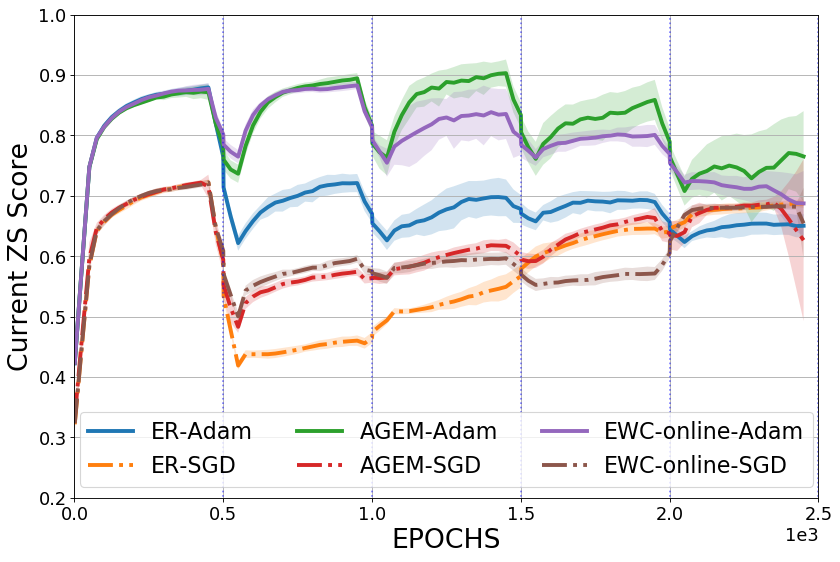

A_T for ER_hard_Adam is:  0.49913599999999997 +/- 0.016444761354303682
A_T for ER_hard_SGD is:  0.45268959999999997 +/- 0.021055898723160663
A_T for AGEM_hard_Adam is:  0.8470304000000001 +/- 0.04108316058727716
A_T for AGEM_hard_SGD is:  0.5661151999999999 +/- 0.012230003342599712
A_T for EWC_online_hard_Adam is:  0.6594192 +/- 0.054358446859342824
A_T for EWC_online_hard_SGD is:  0.5047264 +/- 0.019253050310015826
HARD agents, eval_score_zs_curtask


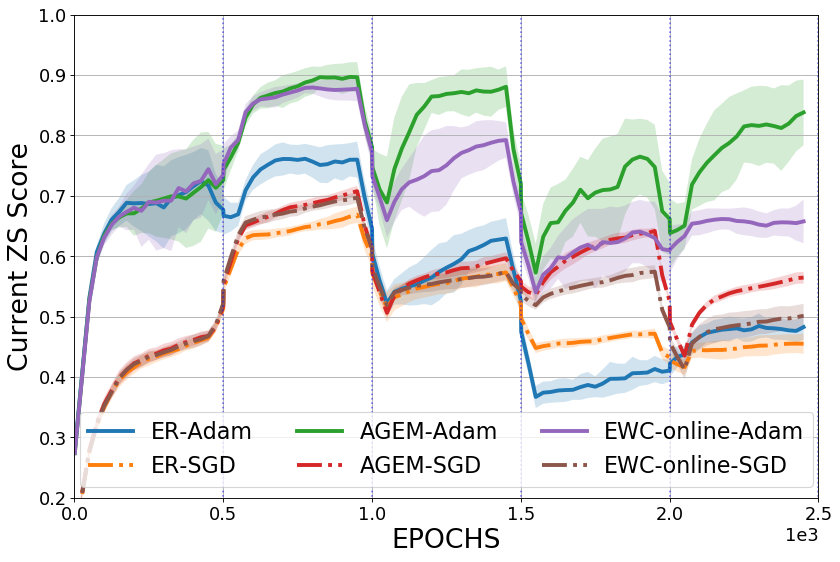

In [13]:
num_tasks = 5
task_length = 500
Agent_types = ['EASY', 'HARD']
metrics = ["eval_score_zs_curtask"]

y_labels = ["Current ZS Score"]

x_axises = ["epoch_zs_curtask"]

methods_to_plot = [
                   ["ER_easy_Adam",
                    "ER_easy_SGD",
                    'AGEM_easy_Adam',
                    'AGEM_easy_SGD',
                    "EWC_online_easy_Adam",
                    "EWC_online_easy_SGD",] ,
                    ["ER_hard_Adam",
                     "ER_hard_SGD",
                    'AGEM_hard_Adam',
                     'AGEM_hard_SGD',
                    "EWC_online_hard_Adam",
                     "EWC_online_hard_SGD"]
                   ]


for k in range(0, len(Agent_types)):
        
    fig = plt.figure(figsize=(12,8))
    axes = fig.subplots(nrows=1, ncols=1)
    if not os.path.exists('plots/full_cruves/' + Agent_types[k]):
            os.makedirs('plots/full_cruves/' + Agent_types[k])
            
    for metric, x_axis, ylabel, ax in zip(metrics, x_axises, y_labels, fig.axes):
        
        for method in methods_to_plot[k]:
            num_seeds = len(results_dict[k][method])

            if num_seeds > 0:
                if len(method.split('_')) == 3:
                    label = method.split('_')[0] + '-' + method.split('_')[2]
                elif len(method.split('_')) == 4:
                    label = method.split('_')[0] + '-' + method.split('_')[1] + '-' + method.split('_')[3]

                y_max_len, x_max_len, s_max = 0, 0, 0
                for s in range(num_seeds):
                    if len(results_dict[k][method][s][metric]) > y_max_len:
                        y_max_len = len(results_dict[k][method][s][metric])
                        y_max_len_curve = results_dict[k][method][s][metric]
                        s_max= s
                    if metric == "avg_zs_score":
                        print('max_curve:{},{}, seed:{}, length:{}'.format(method, methods_ids[k][method][s], s, len(results_dict[k][method][s][metric])))
                    if len(results_dict[k][method][s][x_axis]) > x_max_len:
                        x_max_len = len(results_dict[k][method][s][x_axis])
                        x_max_len_curve = results_dict[k][method][s][x_axis]
                if metric == "avg_zs_score":
                    print('max_num_epochs:', y_max_len)
                y = np.zeros((num_seeds, y_max_len))
                
                
                for s in range(num_seeds):
                    x_list = list(range(y_max_len))
                    length = y_max_len
                    if len(results_dict[k][method][s][metric]) < y_max_len:
                        start_idx_to_remove = y_max_len - len(results_dict[k][method][s][metric])
                        to_remove = [0, 21, 42, 63, 84][-start_idx_to_remove:]
                        if metric.split('_')[-1] == 'forgetting':
                            to_remove = [0, 21, 42, 63][-start_idx_to_remove:]
                        if method.split('_')[0] == 'Multi':
                            to_remove = [0]
                        for r in to_remove:
                            x_list.remove(r)
                        
                        y[s, to_remove] = np.array(results_dict[k][method][s_max][metric])[to_remove] / 25
                    y[s, x_list[:len(results_dict[k][method][s][metric])]] = np.array(results_dict[k][method][s][metric]) / 25
                    

                if method.split('_')[-1] == 'SGD':
                    ls = '-.'
                elif method.split('_')[-1] == 'Adam':
                    ls = '-'
                
                if method.split('_')[0] == 'Multi':
                    ls = '--'
                    N = 1 
                    ax.plot(x_max_len_curve[0:-1],  y.mean(axis=0)[0:-1], ls, alpha=1, lw=3.5, label=label)
                    print('A_T for {} is:  {} +/- {}'.format(method, y.mean(axis=0)[-1], y.std(axis=0)[-1]))

                else:
                    N = 5
                    ax.plot(x_max_len_curve[0:-2],  np.convolve(y.mean(axis=0), np.ones(N)/N, mode='full')[N-3:-N+3-2], ls, alpha=1, lw=3.5, label=label)

                    y_mean = np.convolve(y.mean(axis=0), np.ones(N)/N, mode='full')[N-3:-N+3-2]
                    y_std = np.convolve(y.std(axis=0), np.ones(N)/N, mode='full')[N-3:-N+3-2]

                    ax.fill_between(x_max_len_curve[0:-2], y_mean - y_std, y_mean + y_std,
                  alpha=0.2)
                    print('A_T for {} is:  {} +/- {}'.format(method, y.mean(axis=0)[-1], y.std(axis=0)[-1]))

        
        for i in range(num_tasks):
            ax.plot([task_length*(i+1)]*50, np.linspace(0, 25, 50), 'b:', alpha=0.5)

        
        ax.set_ylim([0.2, 1])
        ax.set_xlim([0, 2.5e3])
        
        if metric.split('_')[-1] == 'forgetting':
            ax.set_ylim([-0.1, 1])
        if metric.split('_')[1] == 'future' or metric.split('_')[2] == 'future':
            ax.set_xlim([0, 2e3])
        
        ax.grid()
        ax.set_xlabel('EPOCHS', **hfont)
        ax.set_ylabel(ylabel, **hfont)
        ax.xaxis.label.set_fontsize(24)
        ax.yaxis.label.set_fontsize(24)
        print(Agent_types[k] + ' agents, ' + metric)
        ax.legend(loc='best', ncol=3, prop={'size': 20})
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        lines, labels = fig.axes[-1].get_legend_handles_labels()
#         fig.legend(lines, labels, loc = 'lower center', ncol=3, prop={'size': 20})

#     plt.savefig('plots/full_cruves/Figure_Adam_SGD_'+method.split('_')[-1]+'_' +Agent_types[k]+'.png', dpi=200)
    plt.show()
